<a href="https://colab.research.google.com/github/alemano/triage-urgencias/blob/main/01_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importe d bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
url=("https://raw.githubusercontent.com/alemano/triage-urgencias/refs/heads/main/01_data/raw/Clasificaci%C3%B3n_en_Triage_Urgencias_20260109.csv")
df=pd.read_csv(url)
df.head()

,CodAdminis,Nom_Admini,Fecha_Ing,Hora_Ingre,Fecha_Atencion,Hora_Atencion,Triage,Ips,Red
0,ESS118,EMSSANAR S.A.S,2020 Jan 23 08:29:02 AM,1900 Jan 01 08:29:00 AM,2020 Jan 23 08:36:00 AM,1900 Jan 01 08:36:00 AM,III,HOSPITAL LOCAL CIVIL,RED NORTE
1,ESS118,EMSSANAR S.A.S,2020 Jan 23 08:29:02 AM,1900 Jan 01 08:29:00 AM,2020 Jan 23 08:36:00 AM,1900 Jan 01 08:36:00 AM,III,HOSPITAL LOCAL CIVIL,RED NORTE
2,ESS118,EMSSANAR S.A.S,2020 Jan 14 09:27:46 AM,1900 Jan 01 09:27:00 AM,2020 Jan 14 10:18:00 AM,1900 Jan 01 10:18:00 AM,III,HOSPITAL LOCAL CIVIL,RED NORTE
3,ESS118,EMSSANAR S.A.S,2020 Feb 29 09:01:31 AM,1900 Jan 01 09:01:00 AM,2020 Feb 29 09:11:00 AM,1900 Jan 01 09:11:00 AM,III,CENTRO HOSPITAL LA ROSA,RED SUR
4,ESS118,EMSSANAR S.A.S,2020 Feb 09 05:26:00 PM,1900 Jan 01 05:26:00 PM,2020 Feb 09 05:50:00 PM,1900 Jan 01 05:50:00 PM,III,HOSPITAL LOCAL CIVIL,RED NORTE


In [ ]:
## revision d elasa columnas que tiene el dataset
df.columns


Index(['CodAdminis', 'Nom_Admini', 'Fecha_Ing', 'Hora_Ingre', 'Fecha_Atencion',
       'Hora_Atencion', 'Triage', 'Ips', 'Red'],
      dtype='object')

In [ ]:
## revision del numero de columnas y filas del dataset
df.shape

(89453, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89453 entries, 0 to 89452
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CodAdminis      89452 non-null  object
 1   Nom_Admini      89452 non-null  object
 2   Fecha_Ing       89453 non-null  object
 3   Hora_Ingre      89453 non-null  object
 4   Fecha_Atencion  89453 non-null  object
 5   Hora_Atencion   89453 non-null  object
 6   Triage          89453 non-null  object
 7   Ips             89453 non-null  object
 8   Red             89453 non-null  object
dtypes: object(9)
memory usage: 6.1+ MB


In [8]:
## vista estadistica
# Estadísticas descriptivas de variables numéricas
df.describe()



,CodAdminis,Nom_Admini,Fecha_Ing,Hora_Ingre,Fecha_Atencion,Hora_Atencion,Triage,Ips,Red
count,89452,89452,89453,89453,89453,89453,89453,89453,89453
unique,81,89,75369,1440,74883,1439,5,8,4
top,ESS118,EMSSANAR S.A.S,2021 Dec 03 01:44:45 PM,1900 Jan 01 08:59:00 AM,2020 Jan 14 10:18:00 AM,1900 Jan 01 11:53:00 AM,III,HOSPITAL LOCAL CIVIL,RED NORTE
freq,67170,57806,14,146,6,136,79198,33256,33275


### Observaciones iniciales del dataset

- El dataset contiene X registros y Y variables.
- La mayoría de las variables son categóricas.
- Se identifica la variable **[nombre]** como posible objetivo (target).
- Se observan columnas que requerirán limpieza y normalización.


In [10]:
## conteo de datos segun variable a analiuzar
df['Triage'].value_counts()


,count
Triage,
III,79198
IV,6934
II,2710
V,408
I,203


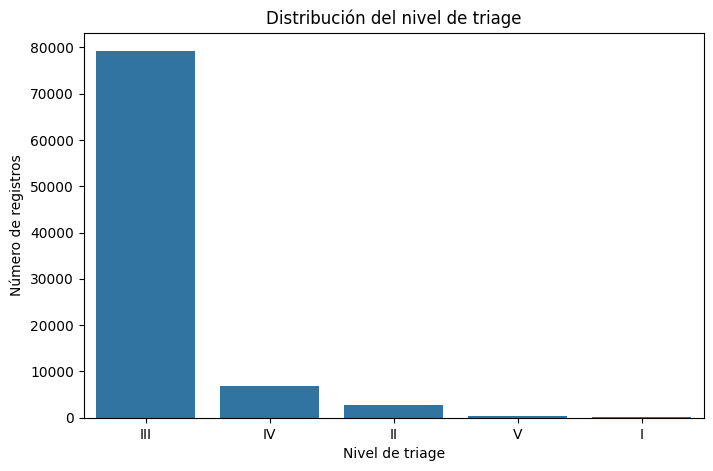

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='Triage',
    order=df['Triage'].value_counts().index
)
plt.title("Distribución del nivel de triage")
plt.xlabel("Nivel de triage")
plt.ylabel("Número de registros")
plt.show()


### Análisis de la variable objetivo

Se observa un fuerte desbalance en la variable objetivo, donde el nivel III
representa aproximadamente el 88% de los registros. Los niveles I y II
corresponden a un porcentaje muy bajo de los casos.

Debido a este desbalance, se propone replantear el problema como una
clasificación binaria entre casos de alta prioridad (I–II) y no críticos (III–V),
con el fin de construir un modelo más robusto y útil para la gestión operativa.
